# Salary Categorization Analysis

## Objectives

While there are many students that enter college with a fully-detailed plan about their future career path, its not uncommon to find students that are struggling with what major to choose, let alone a career. I know that when I had looked through my options of careers, I would quickly look up the highest paid careers and would work down from there. Looking back at this, knowing that I wasn't the only naive student to do this, was not a very methodical approach to my issue. I would like to break down the complexities of salaries through this project and even provide a single number that could encapsulate a major's salary performance to replace a generic median salary figure. Although there are many different important components of a career that caters to a person's interests, we will be looking at Undergraduate Majors and the salary expectations that are tied them. 

This project delves into the intricate relationship between Undergraduate Major and the correlated salary categorization. In this study we aim to explore:
* Can we provide a point system that assists the audience in understanding that major's relative standing based on salary?
* Which majors seem to perform the best given our point system that accounts for all categories
* What majors are best in each income category? Does our point system reflect these results?

Through our research we will address the above-mentioned exploration topics in order to empower an audience (likely made up of current and future college students) to make informed decisions on an important factor like salary.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as p

### DATA SET UP
p.options.display.float_format = '{:,}'.format
df = d.read_csv("data/degrees-that-pay-back.csv")

## A look at the Data

Our data set has been taken from the Wall Street Journal from Payscale Inc. The raw data came from a csv with 50 different Undergraduate majors, while having 7 different attributes about that major's expected income per year. The salary attributes that are listed are:
* Starting Median Salary
* Mid-Career Median Salary 
* Percent change from Starting to Mid-Career Salary
* Mid-Career 10th, 25th, 75th and 90th Percentile Salary

I really like this data because it actually takes into account the lower percentile salaries. While it may seem useless to provide those values to some, I find it very helpful to an extremely risk averse audience. The type of student who is not entirely confident in his/her ability to perform in the work industry might want to search a career path with salary safety; this would point to careers with high 10th and 25th percentiles because it would give a sizeable income to those who do not perform in the high percentiles. "Percent change from Starting to Mid-Career Salary" was a column that I debated on getting rid of. I believed this was appropriate because I found that the percent growth from starting salary to mid-career salary is irrelevant compared to the raw salary. 

### Data Cleaning

There was a number of things I had to do with this data to prepare it for analysis. But because this data set is derived from the Wall Street Journal, a reputable source, it was not very messy. There was no need for any removing of duplicates or fixing typos. Instead, we cleaned and manipulated the data in order to easily use it for our purposes in Python and tailor it to our objectives. This is a list of everything I've done to the data set:
* Salary Numbers Formatting: When I would insert the data into Python, it would intake the dollar amounts as string values instead of integers and would order them incorrectly as a result. This is because the original data set recorded salaries with dollar signs in Excel. I used simple functions to convert these into raw integers for a quick fix.
* Creation of Point systems: Because the original data set didn't have an attribute that would accumulate each major's performance in every single salary categorization, I've used Python in order to create a point ranking system. I will go more into detail about this below.
* Deletion of percent change attribute: There is a column that holds data about the percent change from starting to median salary. At one point in this project I've decided to entirely remove that column before we do our analysis because I believed it to be irrelevant.
* Index Reset: While it's a very small detail, I've allowed the indexes during the creation of the data structure for capturing the information, but once we've introduced rankings I had to reset the indexes in order to make coding easier.

## Objective 1: Ranking System for each Major

### 1st Point System: "Total Points"

Our goal here is to calculate a single number that would effectively measure the salary performance of each Undergraduate major. The code below makes use of pandas dataframes, nested for loops, and dictionaries in order to assign points to each major according to their ranking on each income category, and tallying them up to create this single point number. Below is an ordered list of Undergraduate Majors and their point count.

In [2]:
# Creating Total Points System
colnames = list(df)
colnames.pop(0)
salary_dict = {}
for attribute in colnames:
    #inserting into a map for specific salary category and ordering them
    salary_dict[attribute] = df[['Undergraduate Major', attribute]].sort_values(by=attribute, ascending = False)
    #assigning points based on position
    salary_dict[attribute]['points'] = range(len(df), 0, -1)
new_df = df
new_df['Total Points'] = 0
#accumulating all ranking points to a single total points column
for key in salary_dict:
    for index, row in salary_dict[key].iterrows():
        new_df.loc[df['Undergraduate Major'] == row['Undergraduate Major'], 'Total Points'] += row['points']

#display rankings
print(new_df[['Undergraduate Major', 'Total Points']].sort_values(by='Total Points', ascending = False))

                     Undergraduate Major  Total Points
8                   Chemical Engineering           326
12                  Computer Engineering           312
17                             Economics           309
19                Electrical Engineering           306
44                               Physics           303
1                  Aerospace Engineering           298
37                                  Math           286
30                Industrial Engineering           280
13                      Computer Science           277
22                               Finance           276
38                Mechanical Engineering           274
10                     Civil Engineering           259
14                          Construction           258
36                             Marketing           242
9                              Chemistry           236
45                     Political Science           231
33               International Relations           230
42        

We have now created this point system of how each Undergraduate Major does relatively, but is it too simple? Giving out points strictly based on ranking creates an issue of scalability. More specifically, each major is awarded a whole point for being a rank higher than its former, but that single point cannot capture how large the difference in salaries can be. The difference between 1st and 2nd can be 30,000, but it will be completely overshadowed by that single point due to pure ranking. Knowing this issue, we will need to create a weighted point system where each salary is graded based on the magnitude of the salaries instead of ranking alone.



#### Point System 2 (Preferred System)

Now that we've taken the time to look at how we should structure our point system, I've implemented code that will look at each income number for each major, calculate the number of standard deviations that number is from the average of the current income category, and assign points based on that criteria. The points will be accumulated into a new total points column along with columns that hold those specific points. This will take into account the size of the income differences between the Undergraduate Major salaries in each income category. There will be a preferential scaling factor, and a number to add to the standard deviations to make sure there are no negative points.

In [3]:
#New Point System

#removing the previous point system and percent change column
colnames.pop(2)
df = df.drop(df.columns[[3, 8]], axis = 1)
np_df = df
scaling_factor = 10
sd_boost = 3
np_df["New Points"] = 0
index = 0

#going through each salary in each income category to assign points and apply it to a new column, then adding it to a total column
for income_cat in colnames:
    index = 0
    avg = np.mean(np_df[income_cat])
    std_dev = np.std(np_df[income_cat])
    for each in np_df[income_cat]:
        deviation = each - avg
        num_std_dev = deviation / std_dev
        data_points = (num_std_dev + sd_boost) * scaling_factor
        np_df.loc[index, 'New Points'] = np_df.loc[index, 'New Points'] + data_points
        np_df.loc[index, income_cat + " pts"] = round(data_points, 1)
        index = index + 1

#rounding
np_df['New Points'] = round(np_df['New Points'], 1)

#printing new rankings
print(np_df[["Undergraduate Major", 'New Points']].sort_values(by = 'New Points', ascending = False))




                     Undergraduate Major  New Points
8                   Chemical Engineering       305.9
19                Electrical Engineering       280.4
12                  Computer Engineering       280.0
1                  Aerospace Engineering       266.2
17                             Economics       263.2
30                Industrial Engineering       255.9
38                Mechanical Engineering       254.3
43                   Physician Assistant       252.3
44                               Physics       251.8
13                      Computer Science       243.6
10                     Civil Engineering       239.1
14                          Construction       236.6
22                               Finance       231.6
37                                  Math       226.9
35  Management Information Systems (MIS)       198.9
36                             Marketing       197.8
42                            Philosophy       191.6
9                              Chemistry      

With this new point system there seems to be a small shifting within the ranks. Because we are confident that this new way of assigning points, we will take this set of data and do all our analysis on it.

## Objective 2: Which majors seem to perform the best given all the different salary categories?



In [4]:
#Question: Top 3 Majors

update_fin_rank = np_df.sort_values(by = 'New Points', ascending = False).head(10).reset_index(drop=True)
first = update_fin_rank.loc[0, "Undergraduate Major"]
second = update_fin_rank.loc[1, "Undergraduate Major"]
third = update_fin_rank.loc[2, "Undergraduate Major"]
print(f"1st place is {first} with", update_fin_rank.loc[0, "New Points"])
print(f"2nd place is {second} with", update_fin_rank.loc[1, "New Points"])
print(f"3rd place is {third} with", update_fin_rank.loc[2, "New Points"])

1st place is Chemical Engineering with 305.9
2nd place is Electrical Engineering with 280.4
3rd place is Computer Engineering with 280.0


With the top 3 majors listed above, we'd like to know more. Simply seeing the top 3 majors with this new point system doesn't give us the whole picture. Below is a radial chart that displays the top 10 majors in this ranking to give better context to the top performers. 

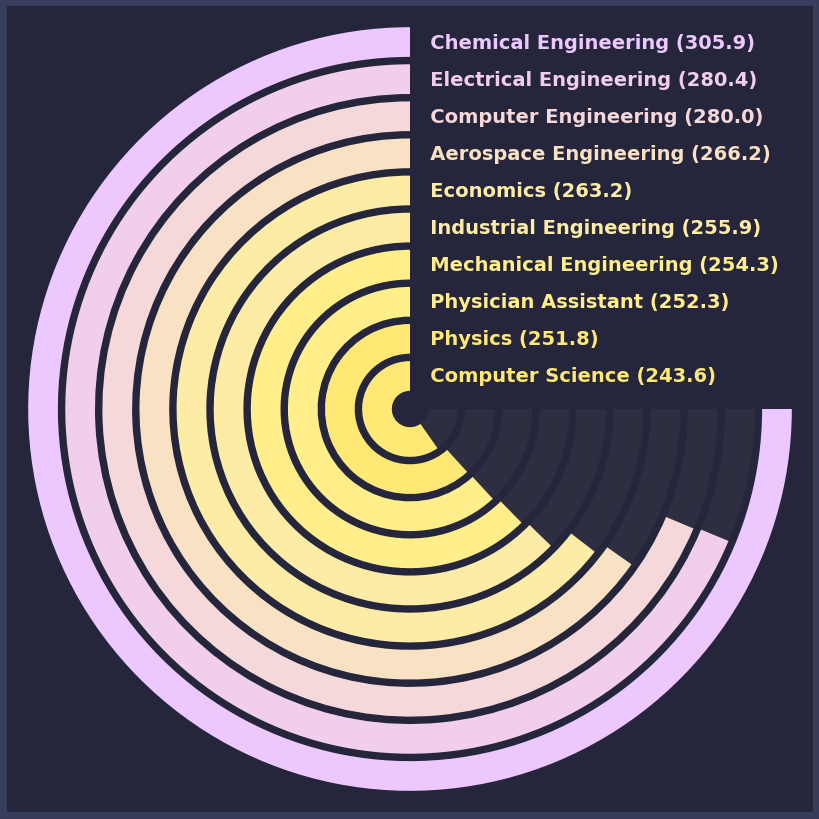

In [5]:
#Radial Chart Ranking Top 10 Majors

# Reversing lists to make it look better
top5_majors = update_fin_rank["Undergraduate Major"]
top5_majors_r = list(top5_majors)
top5_majors_r.reverse()
fin_rank_totals_r = list(update_fin_rank.loc[0:11, 'New Points'])
fin_rank_totals_r.reverse()


lith_dict = {'LITH': top5_majors_r,
             'COUNT': fin_rank_totals_r}

radial_df = p.DataFrame.from_dict(lith_dict)
max_value_full_ring = max(radial_df['COUNT'])
data_len = len(radial_df)
colors = ['#FFE873', '#FFE873', '#FFEE8A', '#FFEE8A', '#FDECA6', '#FDECA6', '#F9E2C4', '#F5D8D9', '#F1CFEC', '#EDC8FF']

ring_labels = [f'   {x} ({v}) ' for x, v in zip(list(radial_df['LITH']),
                                                 list(radial_df['COUNT']))]

fig = plt.figure(figsize=(10, 10), linewidth=10,
                 edgecolor='#393d5c',
                 facecolor='#25253c')

rect = [0.1, 0.1, 0.8, 0.8]

# Add axis for radial backgrounds
ax_polar_bg = fig.add_axes(rect, polar=True, frameon=False)
# Start bars at top of plot
ax_polar_bg.set_theta_zero_location('N')
# Make bars go counter-clockwise.
ax_polar_bg.set_theta_direction(1)

for i in range(data_len):
    ax_polar_bg.barh(i, max_value_full_ring * 1.5 * np.pi / max_value_full_ring,
                     color='grey',
                     alpha=0.1)

ax_polar_bg.axis('off')

# Add axis for radial chart for each entry in the dataframe
ax_polar = fig.add_axes(rect, polar=True, frameon=False)
ax_polar.set_theta_zero_location('N')
ax_polar.set_theta_direction(1)
ax_polar.set_rgrids([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                    labels=ring_labels,
                    angle=0,
                    fontsize=14, fontweight='bold',
                    color='white', verticalalignment='center')

#set the colors of the tick labels
tick_labels = ax_polar.get_yticklabels()
for i, label in enumerate(tick_labels):
    label.set_color(colors[i % len(colors)])

#looping through each total and build a color ring fir each
for i in range(data_len):
    ax_polar.barh(i, list(radial_df['COUNT'])[i] * 1.5 * np.pi / max_value_full_ring,
                  color=colors[i])

#clenaing up
ax_polar.grid(False)
ax_polar.tick_params(axis='both', left=False, bottom=False,
                     labelbottom=False, labelleft=True)

plt.show()


We can see how there seems to be a gradual increase in points when ascending the ranks, but Chemical Engineering finds a way to break free from the main group and earned that 1st spot by a large margin. We would like to see if this gap can be explained by an outstanding score in one specific income category, or just a consistent well-performing major on all accounts.

In order to do explore this dilemma and other possible distribution topics, would also like to display how different these top 5 majors score in each of the 6 income category.

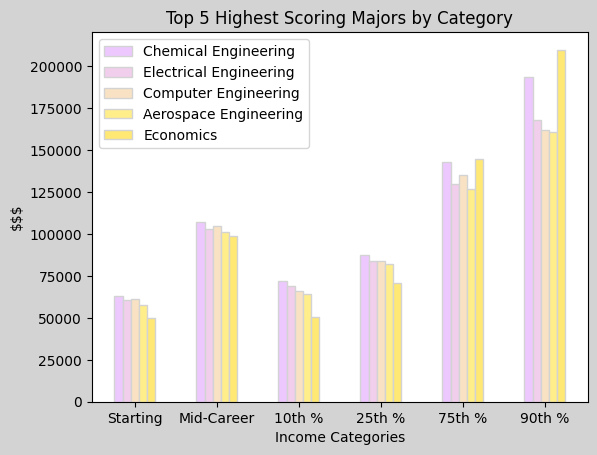

In [6]:
#Split Bar

#making income category names smaller
colnames_small = ['Starting', 'Mid-Career', '10th %', '25th %', '75th %', '90th %']
X_axis = np.arange(len(colnames))

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgray')

#bar for each major for each income category
ax.bar(X_axis - 0.2, update_fin_rank.loc[0, colnames], 0.1, label=top5_majors[0], color=colors[9], edgecolor='lightgray')
ax.bar(X_axis - 0.1, update_fin_rank.loc[1, colnames], 0.1, label=top5_majors[1], color=colors[8], edgecolor='lightgray')
ax.bar(X_axis, update_fin_rank.loc[2, colnames], 0.1, label=top5_majors[2], color=colors[6], edgecolor='lightgray')
ax.bar(X_axis + 0.1, update_fin_rank.loc[3, colnames], 0.1, label=top5_majors[3], color=colors[3], edgecolor='lightgray')
ax.bar(X_axis + 0.2, update_fin_rank.loc[4, colnames], 0.1, label=top5_majors[4], color=colors[1], edgecolor='lightgray')

#cleaning up
ax.set_xticks(X_axis)
ax.set_xticklabels(colnames_small)
ax.set_xlabel("Income Categories")
ax.set_ylabel("$$$")
ax.set_title("Top 5 Highest Scoring Majors by Category")
ax.legend()

plt.show()


As you can see, although Chemical Engineering seems very consistent throughout the categories, we do see the Economics major earning that 1st place spot when it comes to the 75th and 90th percentile. This is exactly why we need to look at the data through a larger scope to capture the entire picture. Because of this analysis, we are able to see the specific components of the incomes and showcase how salaries aren't exactly black and white like most people might believe. This introduces the idea that the ideal major for a student relies heavily on what they value most: highest possible salary, most consistent, safest? We can also now confirm the highest ranked major earned its ranking through consistently high salaries in each element, but how do we know that the majors listed above are the highest in each income category? Could there be other majors that fail to make the top 5 in our point system that will lead an income category?

## Objective 3: Category Rankings and Point validation

In our previous analysis, we discovered that there is more to a major's salary than a single figure or ranking. We recognized the need to delve into the various complexities that contribute to a major's income. To further explore these intricacies, we will utilize the income category data available to gain a deeper understanding of the factors influencing salary within different majors.

In addition to this, we are also taking this opportunity to visualize the corresponding point values we've assigned to those salary amounts based on income category. By incorporating this system alongside the income data, we aim to assess the validity and effectiveness of our point-based evaluation.

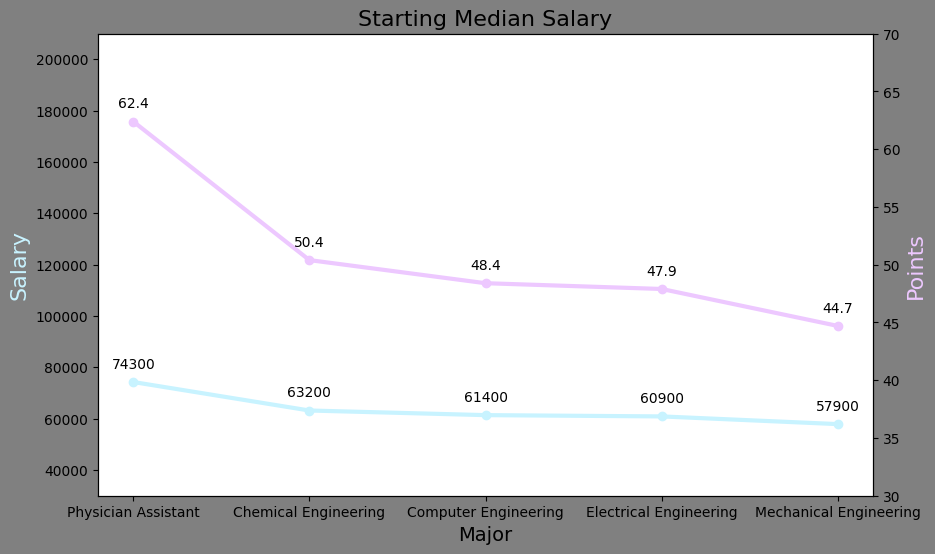

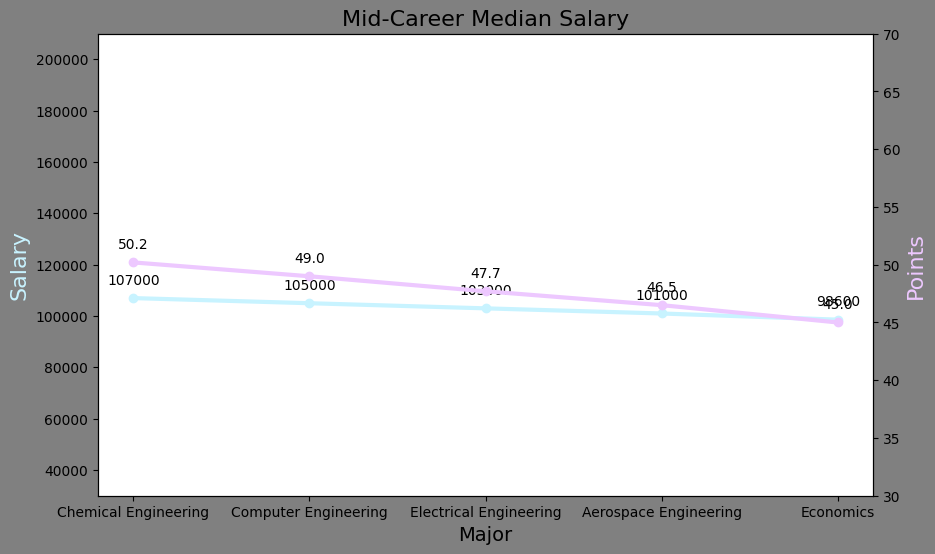

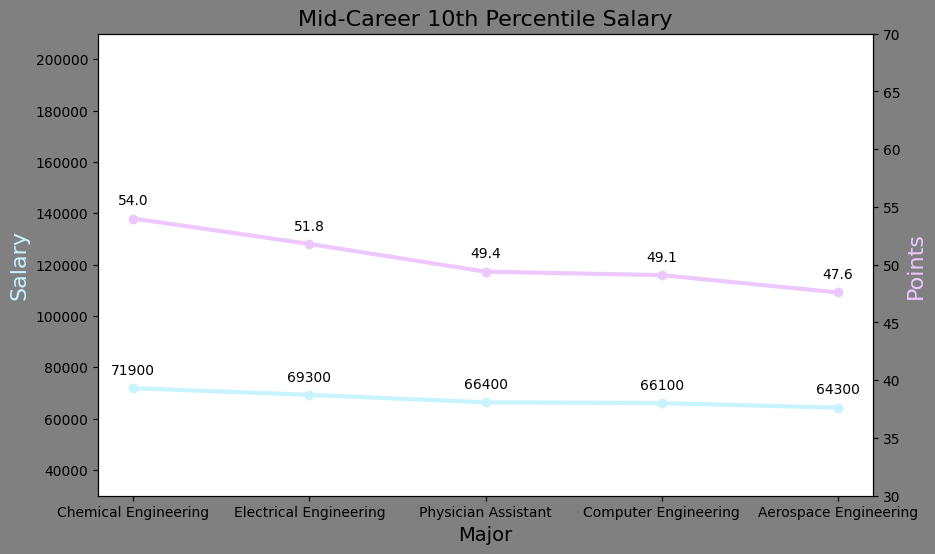

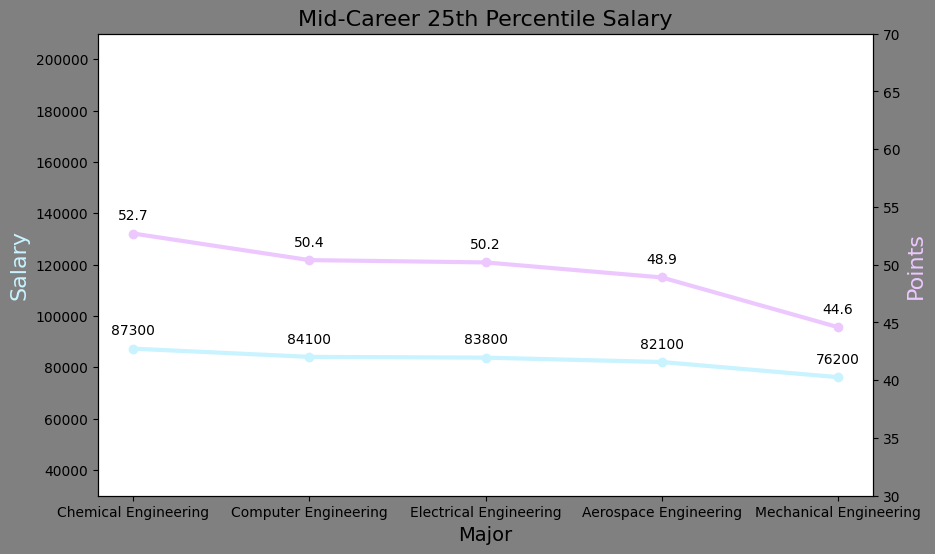

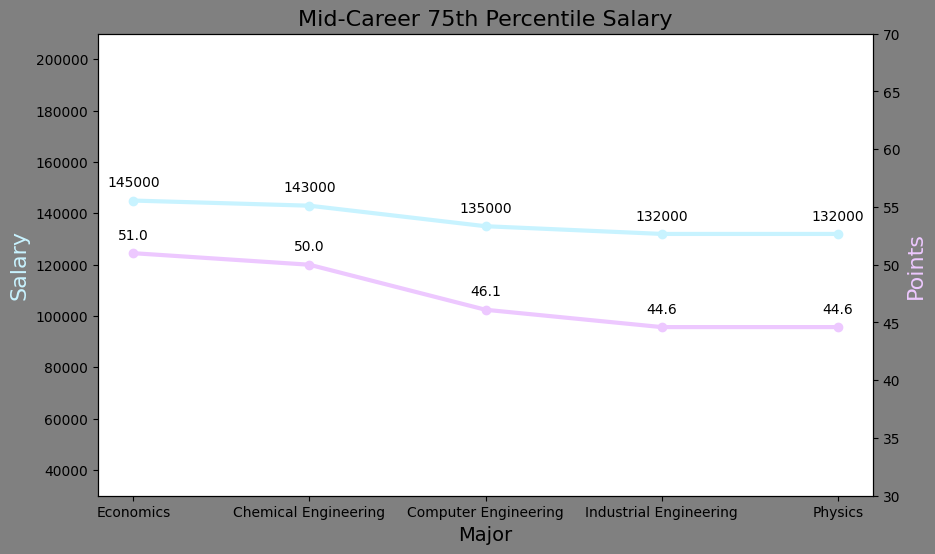

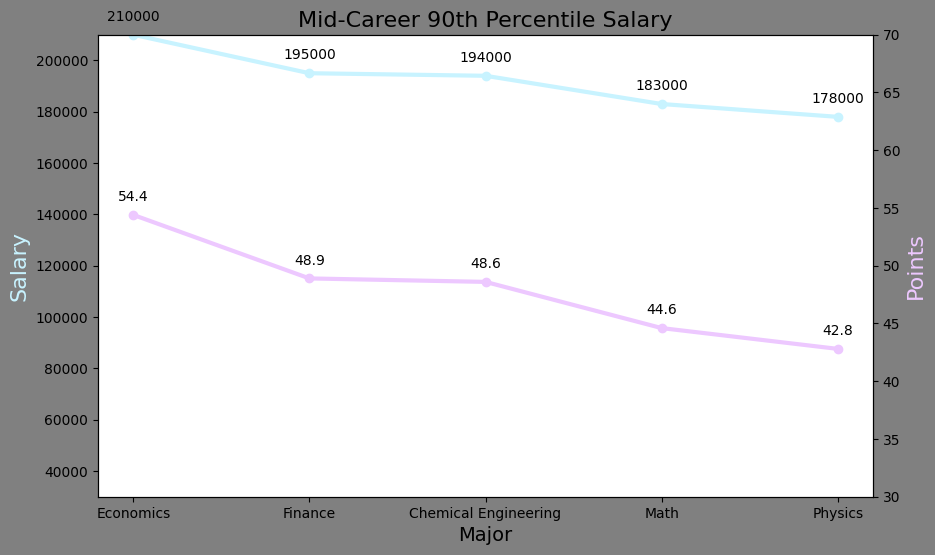

In [7]:
#define colors to use
col1 = '#C8F3FF'
col2 = '#EDC8FF'

    
for category in colnames:   
    df1 = np_df[["Undergraduate Major", category, category + ' pts']].sort_values(by=category, ascending = False).head(5).reset_index(drop=True)
    fig,ax = plt.subplots(figsize=(10, 6))
    fig.patch.set_facecolor('gray')

    #first line plotting
    ax.plot(df1['Undergraduate Major'], df1[category], color=col1, marker='o', linewidth=3)

    #x-axis label
    ax.set_xlabel('Major', fontsize=14)

    #y-axis label
    ax.set_ylabel('Salary', color=col1, fontsize=16)
    
    #controlled y axis to avoid bias
    ax.set_ylim(30000, 210000)
    
    #title
    ax.set_title(category, fontsize=16)

    #defining second y-axis sharing x-axis with current plot
    ax2 = ax.twinx()

    #second line plotting
    ax2.plot(df1['Undergraduate Major'], df1[category + ' pts'], color=col2, marker='o', linewidth=3)

    #labeling points
    for i, (x, y) in enumerate(zip(df1['Undergraduate Major'], df1[category])):
        ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')
        
    for i, (x, y) in enumerate(zip(df1['Undergraduate Major'], df1[category + ' pts'])):
        ax2.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    #right side y-axis label
    ax2.set_ylabel('Points', color=col2, fontsize=16)

    #y limit control for right side
    ax2.set_ylim(30, 70)
    

### Takeaways

####  Rankings

Just as we have confirmed in our previous visualization, Chemical Engineering does not stay as the number 1 spot in every category we have. Even though the top 5 majors based on points have been established, we actually see an Undergraduate Major lead a category that wasn't even on that list. In fact, when we start looking at the Mid-Career 90th Percentile graph, most of the majors there were absent in our top 5 list. Highlighting the importance of establishing the full context of the data set, the top 3 rankings are listed below.

* Starting Median Salary - Physician Assistant: $74,300, Chemical Engineering: $63,200, Computer Engineering: $61,400
* Mid-Career Salary - Chemical Engineering: $107,000, Computer Engineering: $105,000, Electrical Engineering: $102,000
* Mid-Career 10th Percentile Salary - Chemical Engineering: $71,000, Electrical Engineering: $69,300, Physician Assistant: $66,400
* Mid-Career 25th Percentile Salary - Chemical Engineering: $87,300, Computer Engineering: $84,100, Electrical Engineering: $83,800
* Mid-Career 75th Percentile Salary - Economics: $145,000, Chemical Engineering: $143,000, Computer Engineering: $135,000
* Mid-Career 90th Percentile Salary - Economics: $210,000, Finance: $195,000, Chemical Engineering: $194,000

#### Point Validation

Overall the point system seems to be working just fine. Obviously the rankings based off raw income numbers seem to align with the rankings given by our point system. In order to keep them on the same graph I was required to make a different Y axis on the right just for the points, which is shown by the light purple labels. While the pattern from the point system is somewhat a copy from the other, the points seem to hover around the same spot. This is exactly what our goal was with this point system. Although there are some income categories that exceed even 200,000, the point system only sees how far away these points are from the average. The only time more points will be given is because of an abnormally high income compared to the rest of the data. For example, In our Starting Median data set, we can see that the "Physician Assistant" Undergrad Major earns an incredible 62.4 points, the highest amount of points given to a singular major. This shows how much higher a Physician Assistant major typically gets paid when they are starting out. In this point system, we assume that the audience values each of the income categories of equal value. Obviously, this assumption will likely never be correct, but we could easily change tweak the weights of each income category in our point system whenever we'd like.

# Summary
Concluding our analysis, its become apparent through this project that a single point system can be useful for general scouting of an undergraduate major, but a further look into distributions and other perspectives is needed to make a properly informed decision. There are many more discoveries about each undergraduate major by simply looking at more data and looking at more criteria. Before making an extremely important decision about what your future career path is going to be, this project has shown how much care and research needs to be done. Income charactistics alone have allowed us to delve into this questions with many different visualizations comparing majors, but there are many other factors than this that will make for an even more interesting and useful analysis. But based on those characteristics, here are some general statements about some of the more interesting majors:

* Chemical Engineering: Very solid, if not best, in every category. Best overall
* Economics: Has an incredible cap on income but will fall behind in some income categories in rankings such as lower percentile and starting salaries
* Physician Assistant: Very good early-career and very safe
* Computer & Electrical Engineering: Both majors are very consistent throughout rankings, very decent pick.

### Areas for Improvement: 

* Data: As big as this data set is, it does not cover things such as students using their degree for career paths that don't fall under the norm for that major. Many students don't follow the conventional guide to their end-job, and that would mean that they generally use their degree to supplement themselves in an area that is somewhat adjacent to that field. I would like to do a study on which major seems most versatile and which major seems most narrow focused.
* Weight adjustments on point system: As mentioned in our point validation section, this system works as if the user values each income equally. I would like to add a section to play around with the weights of each income category, but I believe Python might not be the best place to add interactivity easily. I might work on a Tableau dashboard in the future with this project that includes this feature.
* Other considerations: When looking at the top highest earners, its important to know that a lot of these careers that earn this much need a lot more than just a bachelors degree. I'm assuming things like Chemical Engineering and Economics need a Masters and/or PHD to earn such an income. In the future I'd also like to do analysis with respect to how much time and money a student has to spend to get to the desired salary figure.